# OpenDC MultiModel Demo

> this file assembles multiple simulation models into a single simulation tool -- <b>the multimodel</b>
> we leverage the outputs of the simulation models, in the same plot
> and more :>

### 0. Imports

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pyarrow.parquet as pq
import fastparquet as fp

### 1. Load the outputs of the simulation models

In [46]:
os.chdir('../../../../../demo/output/')
print("We are now in: ", os.getcwd())

# loop through the files, take only the first word of the file name, which is in format modelname-*
model_names = [file.split('-')[0] for file in os.listdir()]
directories = [d for d in os.listdir() if os.path.isdir(d)]

# output data is a list of lists -- there are multiple arrays, and each array has data for host, server, service, in this order
# basically we will have
host_data = []
server_data = []
service_data = []

print(directories)

# loop through each directory and add the data to the list
for directory in directories:
    host_data.append(pd.read_parquet(os.path.join(directory, 'seed=0/host.parquet')))
    server_data.append(pd.read_parquet(os.path.join(directory, 'seed=0/server.parquet')))
    service_data.append(pd.read_parquet(os.path.join(directory, 'seed=0/service.parquet')))

FileNotFoundError: [Errno 2] No such file or directory: '../../../../../demo/output/'

### 2. Define useful functions

In [ ]:
def mean_of_chunks(series, chunk_size):
    return series.groupby(np.arange(len(series)) // chunk_size).mean(numeric_only=True)

In [ ]:
def plot_singular_model(single_model):
    plt.figure(figsize=(20,10))
    plt.plot(single_model)
    plt.show()

In [47]:
def plot_multi_model_carbon(multi_model):
    plt.figure(figsize=(20,10))
    for model in multi_model:
        plt.ylabel("POwer draw [W]")
        plt.xlabel("Seconds [S]")
        
        # make the y-label between 0-500
        plt.ylim(0, 5)
        
        # add some shadows up and down as a standard deviation
        plt.fill_between(model.index, model - 0.5, model + 0.5, color='gray', alpha=0.5)
        
        # plt.ylim(0, 500)
        plt.plot(model)
    plt.show()
    
host_data[0].columns

Index(['timestamp', 'absolute_timestamp', 'host_id', 'cpu_count',
       'mem_capacity', 'guests_terminated', 'guests_running', 'guests_error',
       'guests_invalid', 'cpu_limit', 'cpu_usage', 'cpu_demand',
       'cpu_utilization', 'cpu_time_active', 'cpu_time_idle', 'cpu_time_steal',
       'cpu_time_lost', 'power_draw', 'energy_usage', 'carbon_intensity',
       'carbon_emission', 'uptime', 'downtime', 'boot_time'],
      dtype='object')

In [48]:
def plot_multi_model_power(multi_model):
    plt.figure(figsize=(20,10))
    for model in multi_model:
        plt.ylabel("POwer draw [W]")
        plt.xlabel("Seconds [S]")

        # make the y-label between 0-500
        plt.ylim(0, 500)

        # add some shadows up and down as a standard deviation
        plt.fill_between(model.index, model - 50, model + 50, color='gray', alpha=0.5)

        plt.ylim(0, 500)
        plt.plot(model)
    plt.show()

host_data[0].columns

Index(['timestamp', 'absolute_timestamp', 'host_id', 'cpu_count',
       'mem_capacity', 'guests_terminated', 'guests_running', 'guests_error',
       'guests_invalid', 'cpu_limit', 'cpu_usage', 'cpu_demand',
       'cpu_utilization', 'cpu_time_active', 'cpu_time_idle', 'cpu_time_steal',
       'cpu_time_lost', 'power_draw', 'energy_usage', 'carbon_intensity',
       'carbon_emission', 'uptime', 'downtime', 'boot_time'],
      dtype='object')

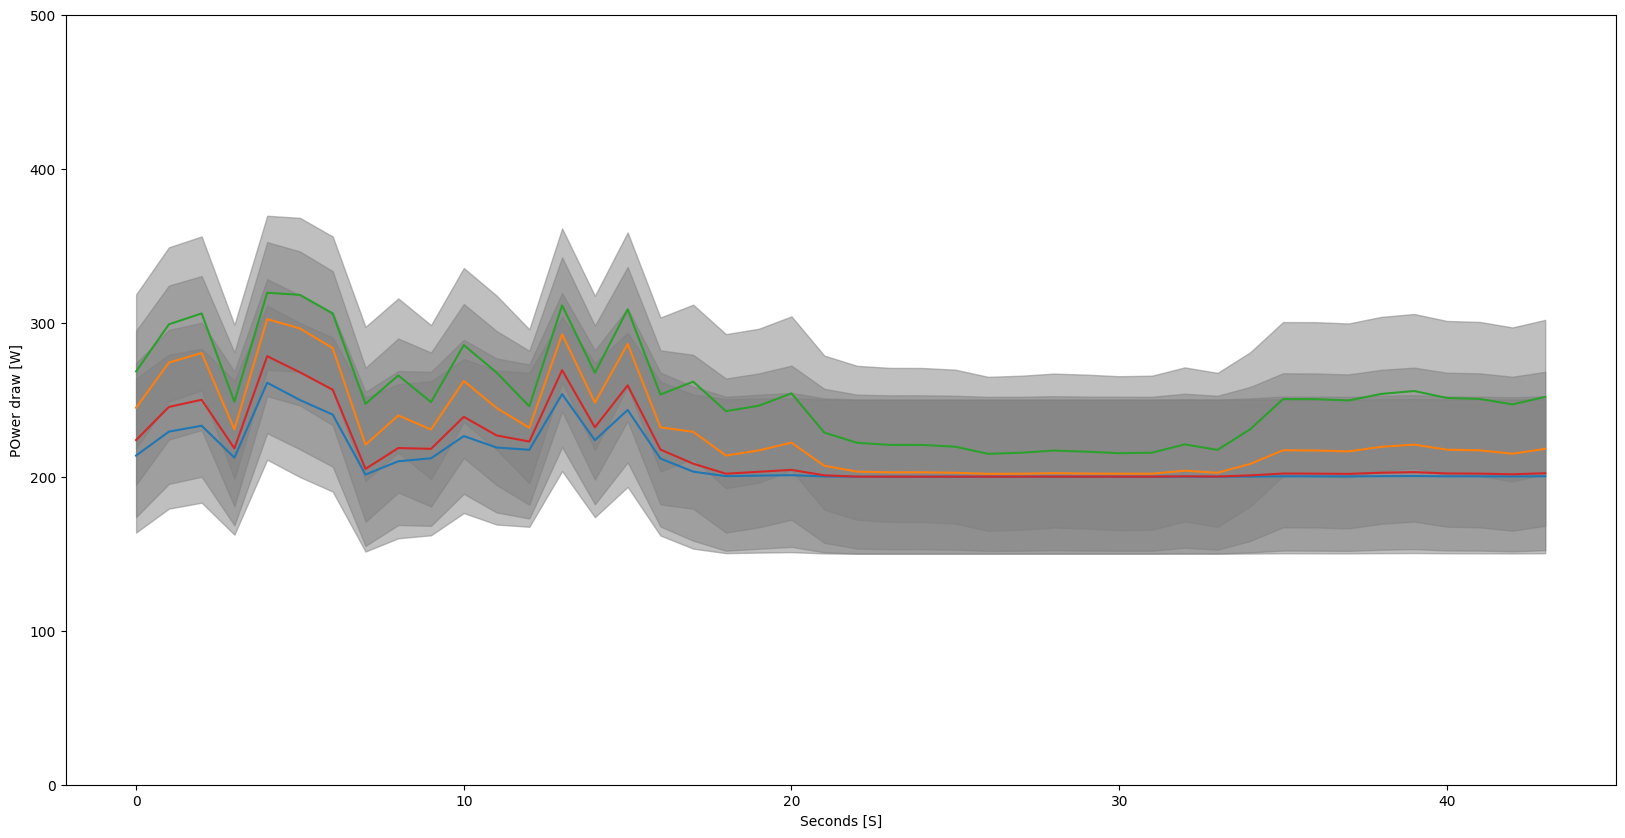

False


In [49]:
### 3. Plot the outputs of the simulation models
simulation_data = [
    mean_of_chunks(host_data[0]['power_draw'], 1000),
    mean_of_chunks(host_data[1]['power_draw'], 1000),
    mean_of_chunks(host_data[2]['power_draw'], 1000),
    mean_of_chunks(host_data[3]['power_draw'], 1000),
]

plot_multi_model_power(simulation_data)
areEqual = host_data[0].equals(host_data[3])
print(areEqual)

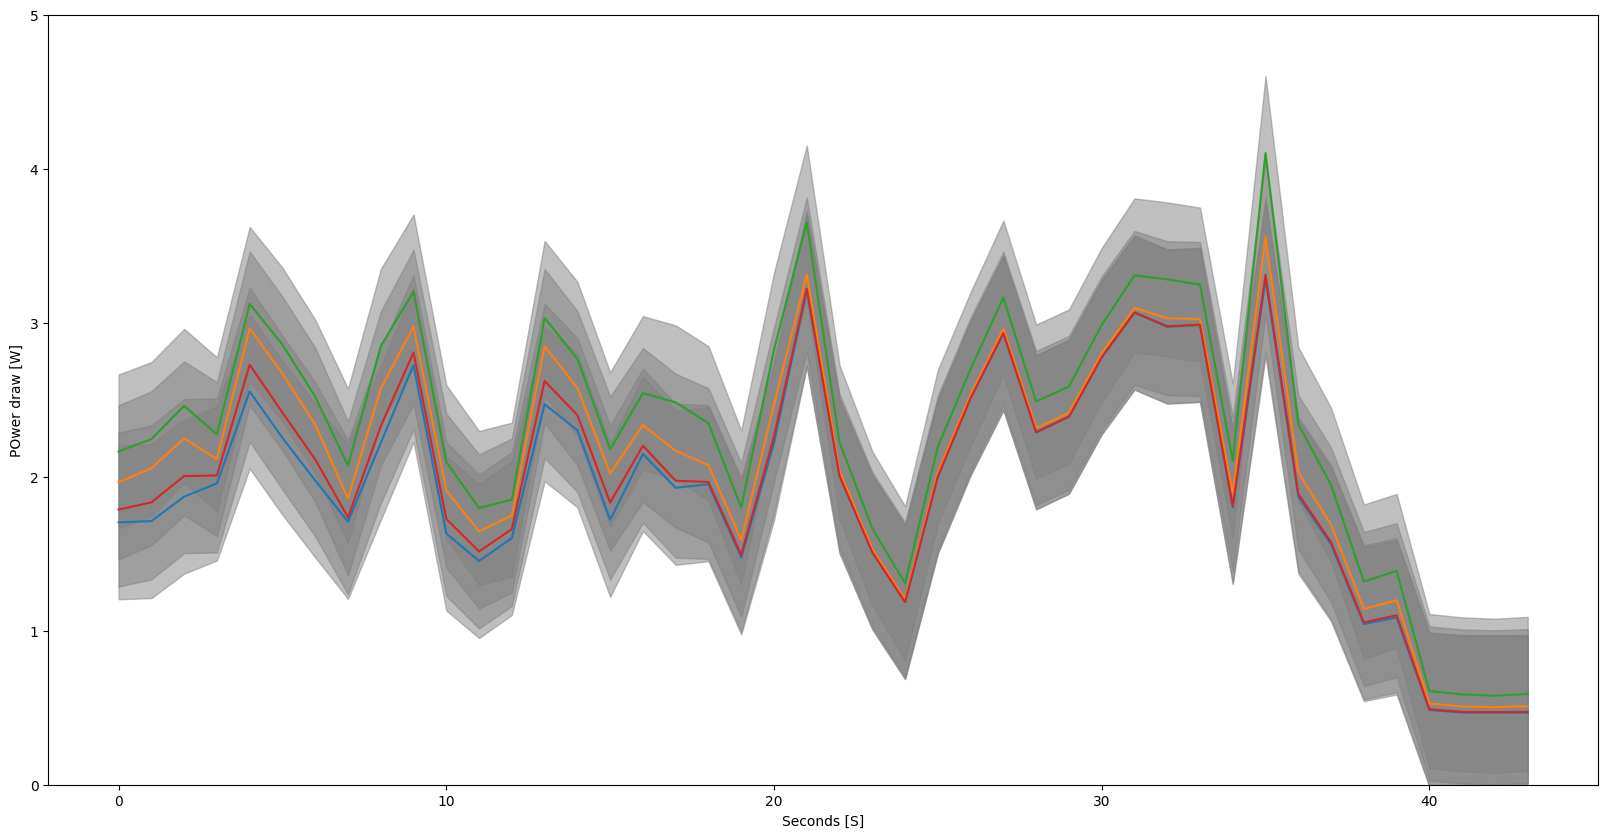

False


In [50]:
### 3. Plot the outputs of the simulation models
simulation_data = [
    mean_of_chunks(host_data[0]['carbon_emission'], 1000),
    mean_of_chunks(host_data[1]['carbon_emission'], 1000),
    mean_of_chunks(host_data[2]['carbon_emission'], 1000),
    mean_of_chunks(host_data[3]['carbon_emission'], 1000),
]

plot_multi_model_carbon(simulation_data)
areEqual = host_data[0].equals(host_data[3])
print(areEqual)

In [51]:
host_data[0]

,timestamp,absolute_timestamp,host_id,cpu_count,mem_capacity,guests_terminated,guests_running,guests_error,guests_invalid,cpu_limit,...,cpu_time_idle,cpu_time_steal,cpu_time_lost,power_draw,energy_usage,carbon_intensity,carbon_emission,uptime,downtime,boot_time
0,300000,1376314846000,e220a839-7b1d-cdaf-0000-000000000003,32,82000,0,13,0,0,80000.0,...,5854411,301,0,208.909042,62672.853742,43.004721,0.748675,300000,0,0
1,600000,1376315146000,e220a839-7b1d-cdaf-0000-000000000003,32,82000,0,13,0,0,80000.0,...,6212060,0,0,206.593026,61977.907905,42.607796,0.733539,300000,0,0
2,900000,1376315446000,e220a839-7b1d-cdaf-0000-000000000003,32,82000,0,13,0,0,80000.0,...,6320948,0,0,205.977536,61793.260817,42.607796,0.731354,300000,0,0
3,1200000,1376315746000,e220a839-7b1d-cdaf-0000-000000000003,32,82000,0,13,0,0,80000.0,...,7751754,0,0,201.070427,60321.128023,42.607796,0.713931,300000,0,0
4,1500000,1376316046000,e220a839-7b1d-cdaf-0000-000000000003,32,82000,0,13,0,0,80000.0,...,7634338,0,0,201.287668,60386.300489,42.292972,0.709421,300000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43200,12960300000,1389274846000,e220a839-7b1d-cdaf-0000-000000000003,32,82000,0,1,0,0,80000.0,...,8332490,0,0,200.365120,60103.594812,28.089877,0.468973,300000,0,0
43201,12960600000,1389275146000,e220a839-7b1d-cdaf-0000-000000000003,32,82000,0,1,0,0,80000.0,...,8279284,0,0,200.543777,60118.111546,28.089877,0.469086,300000,0,0
43202,12960900000,1389275446000,e220a839-7b1d-cdaf-0000-000000000003,32,82000,0,1,0,0,80000.0,...,8168362,0,0,200.296912,60151.283474,28.089877,0.469345,300000,0,0
43203,12961200000,1389275746000,e220a839-7b1d-cdaf-0000-000000000003,32,82000,0,1,0,0,80000.0,...,8361859,0,0,200.475491,60097.645417,28.089877,0.468927,300000,0,0


In [52]:
# print host_data as a table
service_data[0]


,timestamp,absolute_timestamp,hosts_up,hosts_down,servers_pending,servers_active,attempts_success,attempts_failure,attempts_error
0,300000,1376314846000,1,0,31,13,13,0,0
1,600000,1376315146000,1,0,31,13,13,0,0
2,900000,1376315446000,1,0,31,13,13,0,0
3,1200000,1376315746000,1,0,31,13,13,0,0
4,1500000,1376316046000,1,0,31,13,13,0,0
...,...,...,...,...,...,...,...,...,...
43200,12960300000,1389274846000,1,0,0,1,49,1,0
43201,12960600000,1389275146000,1,0,0,1,49,1,0
43202,12960900000,1389275446000,1,0,0,1,49,1,0
43203,12961200000,1389275746000,1,0,0,1,49,1,0
